In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve
from sklearn.svm import LinearSVC
%matplotlib inline

In [2]:
data = pd.read_csv('OJ.csv')
data = data.dropna()
data = data.drop("Unnamed: 0",axis=1)
X1 = np.array(data[['LoyalCH']])
X2 = np.array(data[['PriceDiff']])
Y1 = np.array(data['Purchase'])
Y1[Y1=='CH'] = 0
Y1[Y1=='MM'] = 1
Y_N= Y1[Y1==0]
Y_S= Y1[Y1==1]
X1_N = X1[Y1==0]
X1_S = X1[Y1==1]
X2_N = X2[Y1==0]
X2_S = X2[Y1==1]
#print(np.shape(X1))
#print(np.shape(Y1))
Y1.dtype
print(np.shape(X1))

(1070, 1)


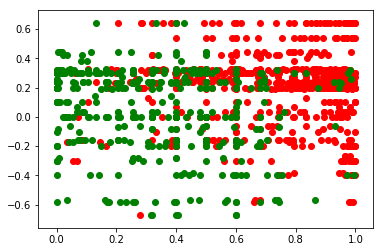

In [3]:
plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
plt.scatter(X1[Y1==1], X2[Y1==1], c='g')

In [6]:
intersecciones = np.linspace(-10,10,100)
pendientes = np.linspace(-10,10,100)
NTotal = len(Y_N)
STotal = len(Y_S)
eficiencias = [0]
trios =[]
for i in intersecciones:
    for j in pendientes:
        ns = 0
        nn = 0
        for y in range(STotal):
            if (i+j*X1_S[y])<(X2_S[y]):
                ns=ns+1
        for y in range(NTotal):
            if (i+j*X1_N[y])>(X2_N[y]):
                nn=nn+1
        estaEficiencia = (nn/NTotal)*(ns/STotal)
        eficiencias.append(estaEficiencia) 
        if max(eficiencias)==estaEficiencia:
            trios.append([i,j,estaEficiencia])


[-5.151515151515151, 9.7979797979798, 0.6237178710324237]


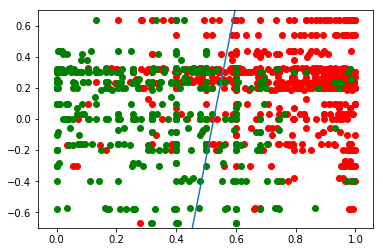

In [7]:
interseccion = trios[-1][0]
pendiente = trios[-1][1]
x = np.linspace(0,1,100)
plt.scatter(X1[Y1==0], X2[Y1==0], c='r')
plt.scatter(X1[Y1==1], X2[Y1==1], c='g')
recta = interseccion + x*pendiente
plt.plot(x,recta)
plt.ylim((-0.7,0.7))
print(trios[-1])

2